In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
from ema_workbench import IntegerParameter, RealParameter, Model, ScalarOutcome, ArrayOutcome

In [3]:
## Load necessary data
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
paths = pickle.load(open("data/final_paths.p", "rb"))

In [4]:
flow_refueling_location_model(1, 50000, 100, 5, 5, 30)

Optimal


(1253.553581213307,
 0.16376847931630456,
 {'103': 0.0,
  '104': 1.0,
  '105': 1.0,
  '106': 0.0,
  '107': 0.0,
  '108': 0.0,
  '109': 0.0,
  '110': 0.0,
  '111': 0.0,
  '112': 0.0,
  '113': 5.0,
  '114': 0.0,
  '115': 0.0,
  '116': 0.0,
  '117': 0.0,
  '118': 0.0,
  '119': 0.0,
  '120': 0.0,
  '121': 0.0,
  '122': 3.0,
  '123': 1.0,
  '124': 0.0,
  '125': 1.0,
  '126': 0.0,
  '127': 0.0,
  '128': 0.0,
  '129': 0.0,
  '130': 4.0,
  '131': 0.0,
  '132': 0.0,
  '22637863': 0.0,
  '22638146': 2.0,
  '22638156': 0.0,
  '22638320': 0.0,
  '22638327': 0.0,
  '30984595': 3.0,
  '8861305': 0.0,
  '8861462': 0.0,
  '8861528': 2.0,
  '8861625': 1.0,
  '8861718': 0.0,
  '8862085': 0.0,
  '8862497': 1.0,
  '8862506': 0.0,
  '8862570': 0.0,
  '8862663': 3.0,
  '8863019': 0.0,
  '8863125': 0.0,
  '8863152': 0.0,
  '8863207': 0.0,
  '8863260': 2.0,
  '8863306': 5.0,
  '8863360': 1.0,
  '8863408': 0.0,
  '8863469': 5.0,
  '8863518': 0.0,
  '8863614': 0.0,
  '8863709': 2.0,
  '8863818': 5.0,
  '8863861

## Works, now connect to workbench

In [ ]:
#define model
model = Model("frlm", function=flow_refueling_location_model)

In [ ]:
#define parameters

# specify uncertainties
model.uncertainties = [
    RealParameter("load", 0.75, 1.25),
    IntegerParameter("r", 50000, 200000),
]

# set levers
model.levers = [
    IntegerParameter("stations_to_place", 10, 350),
    IntegerParameter("station_cap", 1, 5),
    IntegerParameter("max_per_loc", 1, 5),
    IntegerParameter("additional_nodes", 0, 50, [0, 10, 20, 30, 40, 50], True)
]

# specify outcomes
model.outcomes = [
    ScalarOutcome("total_flow"),
    ScalarOutcome("supported_fraction"),
    ScalarOutcome("routes_supported"),
]

In [ ]:
# from ema_workbench import MultiprocessingEvaluator, SequentialEvaluator, ema_logging, perform_experiments
#
# ema_logging.log_to_stderr(ema_logging.INFO)
#
# with MultiprocessingEvaluator(model, n_processes=8) as evaluator:
#     experiments, outcomes = evaluator.perform_experiments(scenarios=50, policies=25)

In [16]:
# pickle.dump( experiments, open( "results/experiments_50s_25.p", "wb" ) )
# pickle.dump( outcomes, open("results/outcomes_50s_25.p", "wb") )
experiments = pickle.load( open("results/experiments_300s_10.p", "rb"))
outcomes = pickle.load( open("results/outcomes_300s_10.p", "rb"))

## Run model for 300 and 10 policies without changing station cap and max per loc

In [18]:
experiments

,load,r,stations_to_place,scenario,policy,model
0,0.799219,134360.0,51.0,10,0,frlm
1,0.896256,199686.0,51.0,11,0,frlm
2,0.780731,157430.0,51.0,12,0,frlm
3,0.979986,126421.0,51.0,13,0,frlm
4,0.418659,175412.0,51.0,14,0,frlm
...,...,...,...,...,...,...
2995,0.021664,78018.0,125.0,305,9,frlm
2996,0.631767,185048.0,125.0,306,9,frlm
2997,0.611384,146397.0,125.0,307,9,frlm
2998,0.511219,156308.0,125.0,308,9,frlm


In [3]:
from ema_workbench import MultiprocessingEvaluator, SequentialEvaluator, ema_logging, perform_experiments
from ema_workbench import IntegerParameter, RealParameter, Model, ScalarOutcome, ArrayOutcome, Constant
ema_logging.log_to_stderr(ema_logging.INFO)

model = Model("frlm", function=flow_refueling_location_model)


In [4]:

# specify uncertainties
model.uncertainties = [
    RealParameter("load", 0.75, 1.25),
    IntegerParameter("r", 50000, 250000),
]

# set levers
model.levers = [
    IntegerParameter("stations_to_place", 1, 350),
    IntegerParameter("station_cap", 1, 5),
    IntegerParameter("max_per_loc", 1, 5)
]

# specify outcomes
model.outcomes = [
    ScalarOutcome("total_flow"),
    ScalarOutcome("supported_fraction"),
]

# model.constants = [
#     Constant("station_cap", 5),
#     Constant("max_per_loc", 5),
# ]

In [5]:
with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    experiments_new, outcomes_new = evaluator.perform_experiments(scenarios=300, policies=20)

[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 300 scenarios * 20 policies * 1 model(s) = 6000 experiments
100%|████████████████████████████████████| 6000/6000 [8:31:43<00:00,  5.12s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
# pickle.dump( experiments, open( "results/experiments_300s_20.p", "wb" ) )
# pickle.dump( outcomes, open("results/outcomes_300s_20.p", "wb") )

In [9]:
experiments = experiments_new
outcomes = outcomes_new


## Visualize results for each policy in a pairplot

In [10]:
policies = experiments["policy"]
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies == policy, "policy"] = str(i)

data = pd.DataFrame(outcomes)
data["policy"] = policies

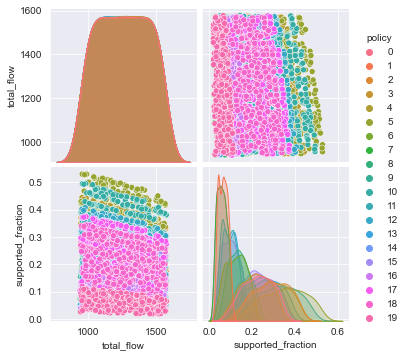

In [11]:
sns.pairplot(data, hue="policy", vars=list(outcomes.keys()))
plt.show()

## "Normal" pairplot?

In [25]:
all_data = experiments.copy()
all_data['total_flow'] = outcomes['total_flow']
all_data['supported_fraction'] = outcomes['supported_fraction']

In [26]:
all_data

,load,r,max_per_loc,station_cap,stations_to_place,scenario,policy,model,total_flow,supported_fraction
0,1.186072,173922.0,3.0,3.0,252.0,20,0,frlm,1494.464736,0.223502
1,1.006170,244026.0,3.0,3.0,252.0,21,0,frlm,1268.097769,0.322997
2,1.138217,108235.0,3.0,3.0,252.0,22,0,frlm,1431.002818,0.168261
3,0.935121,195651.0,3.0,3.0,252.0,23,0,frlm,1174.752877,0.293409
4,0.790706,76733.0,3.0,3.0,252.0,24,0,frlm,996.856908,0.163712
...,...,...,...,...,...,...,...,...,...,...
5995,0.974877,143557.0,1.0,1.0,129.0,315,19,frlm,1230.059883,0.056574
5996,1.043734,175693.0,1.0,1.0,129.0,316,19,frlm,1315.186301,0.064552
5997,1.025206,220701.0,1.0,1.0,129.0,317,19,frlm,1293.472642,0.081087
5998,1.046314,199861.0,1.0,1.0,129.0,318,19,frlm,1315.724775,0.073997


In [27]:
# all_data = all_data.loc[:, ['load','r', 'stations_to_place','total_flow','supported_fraction']]

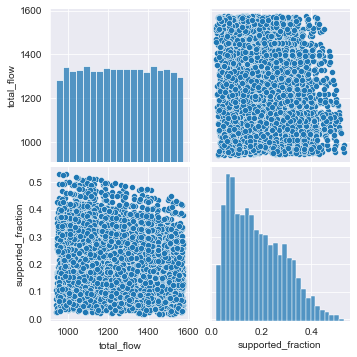

In [28]:
sns.pairplot(all_data, vars=list(outcomes.keys()))

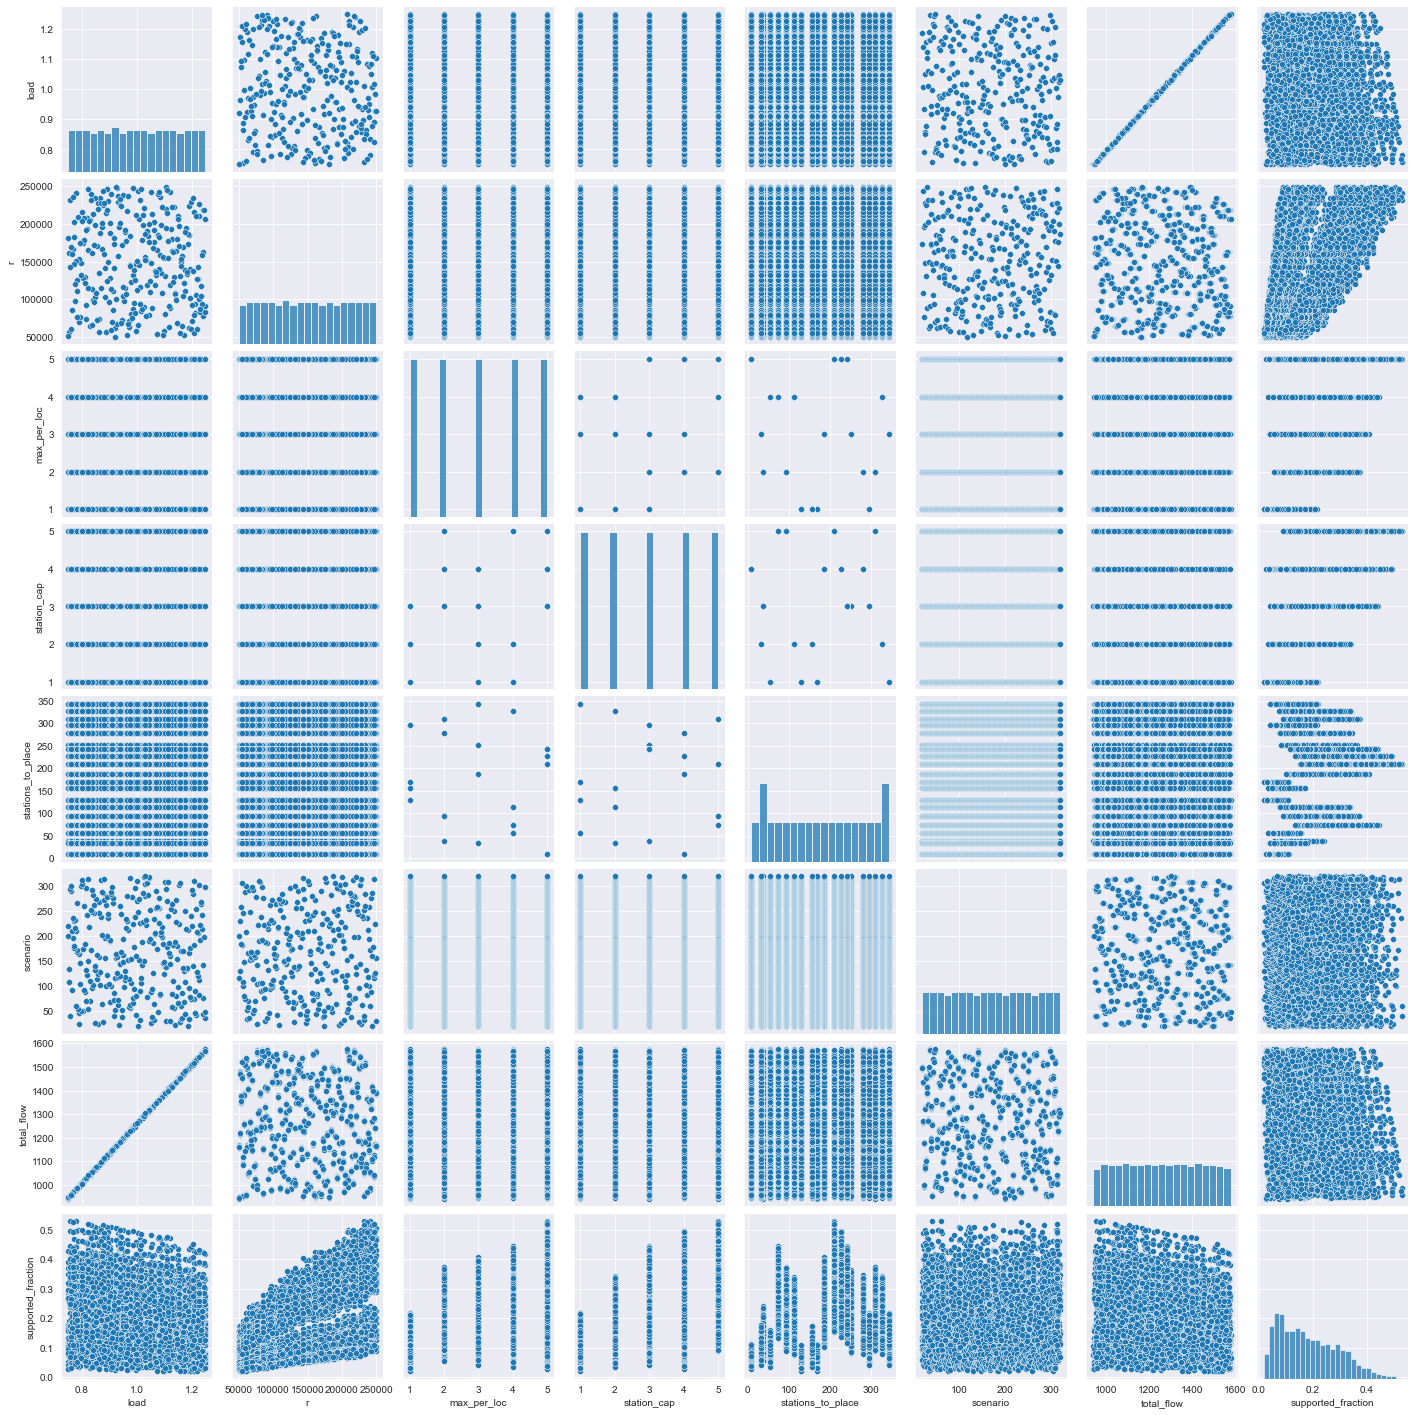

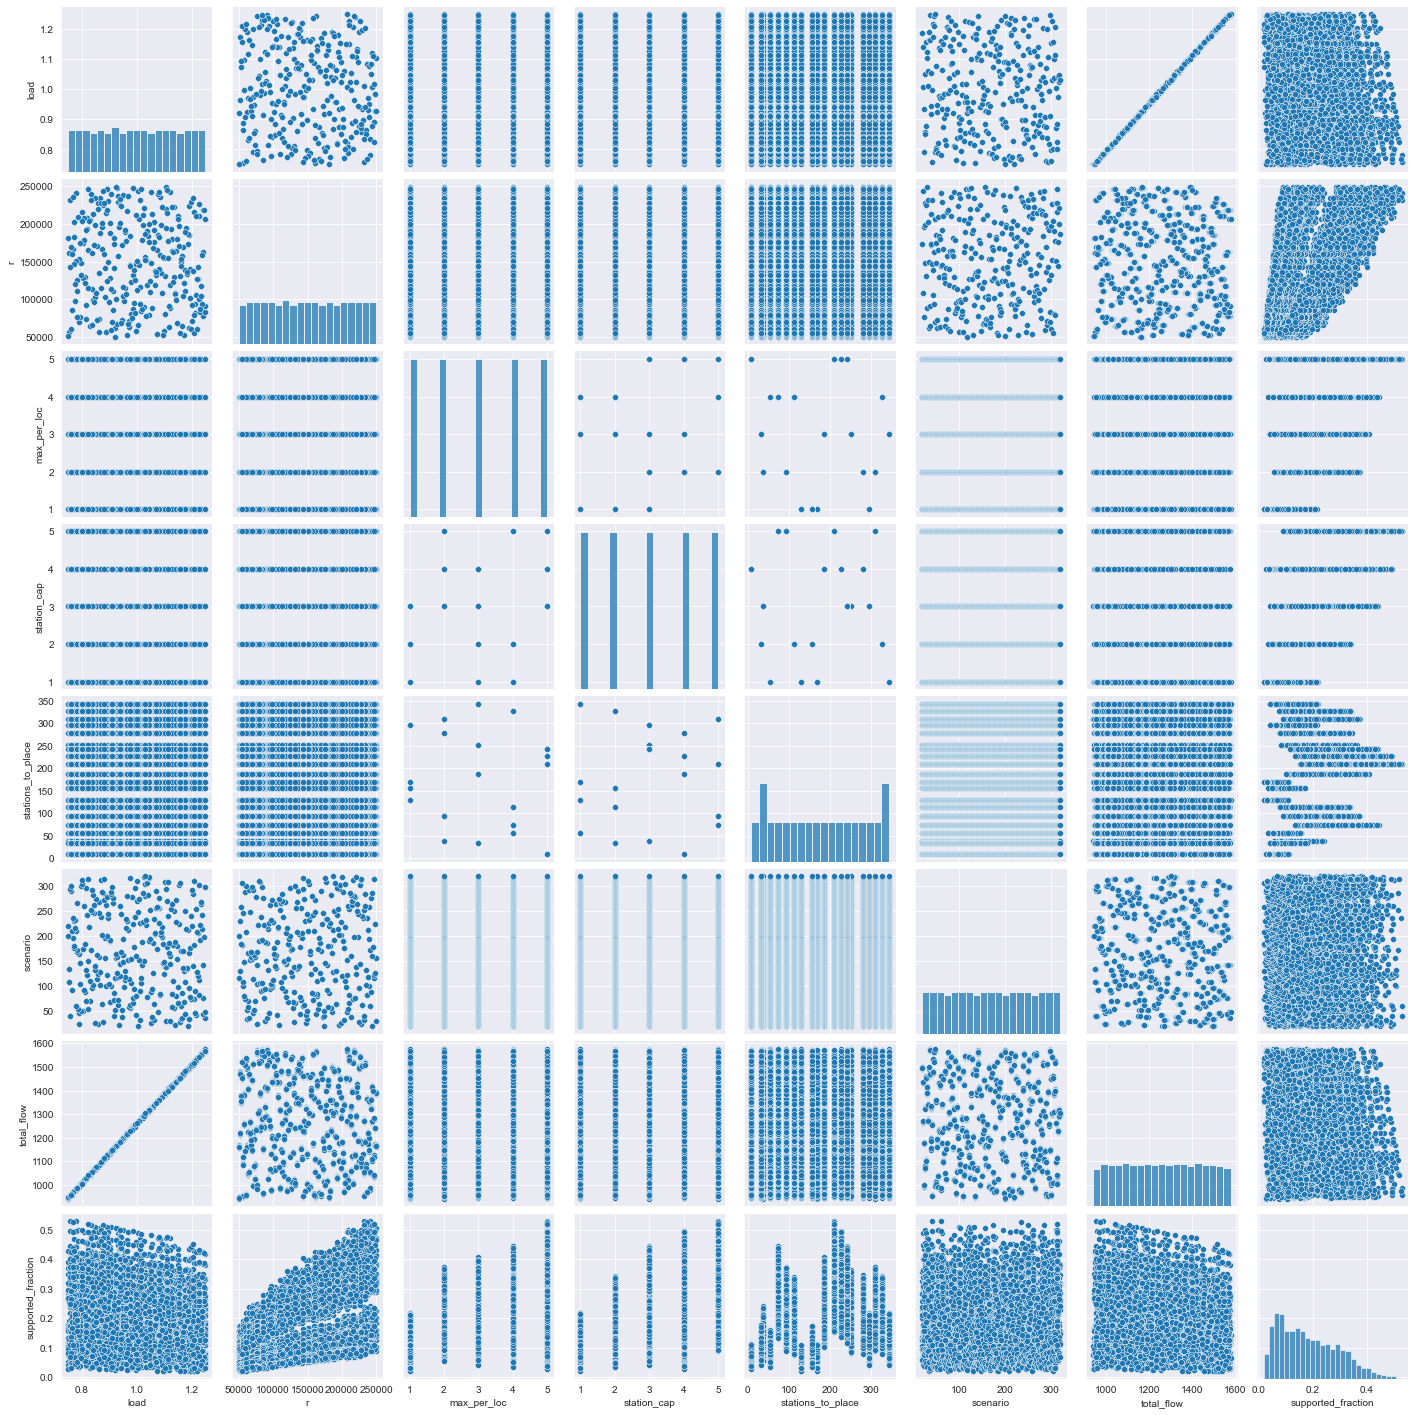

In [29]:
sns.pairplot(all_data)

## Visualize how results are correlated

In [ ]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, group_by="policy", legend=False
)
fig.set_size_inches(8, 8)
plt.show()

In [ ]:
from ema_workbench.analysis import prim
%matplotlib inline
x = experiments
y = (1-outcomes["supported_fraction"]) < 0.8
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

In [ ]:
box1.show_tradeoff()
plt.show()

In [ ]:
box1.inspect(10)
box1.inspect(10, style="graph")
plt.show()

C:\Users\Fabia\Anaconda3\envs\ox\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:419: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


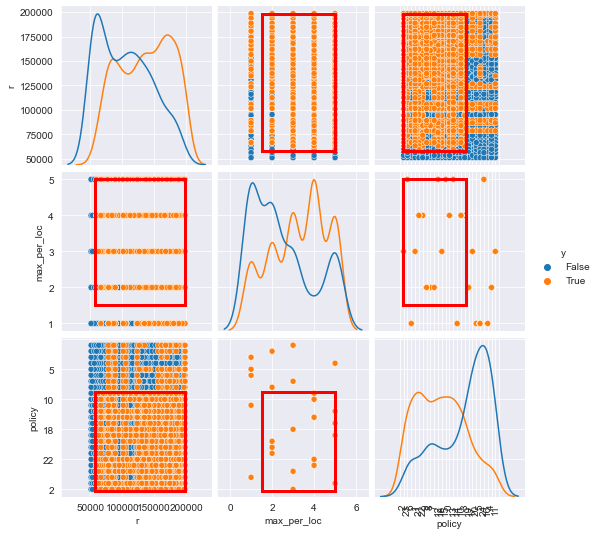

In [23]:
box1.show_pairs_scatter(10)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\Fabia\Anaconda3\envs\ox\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\Fabia\Anaconda3\envs\ox\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Fabia\Anaconda3\envs\ox\lib\site-packages\ema_workbench\analysis\feature_scoring.py:389: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complete = complete.append(fs.T, sort=True)


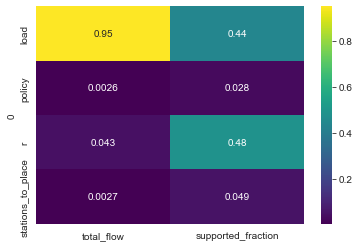

In [24]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [ ]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = (1-outcomes["supported_fraction"]) < 0.8
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

In [ ]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style("white")

# model is the same across experiments
x = experiments.copy()
x = x.drop("model", axis=1)
y = (1-outcomes["supported_fraction"]) < 0.8
fig = regional_sa.plot_cdfs(x, y)
sns.despine()
plt.show()

In [ ]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style("white")

# model is the same across experiments
x = experiments.copy()
x = x.drop("model", axis=1)
y = (outcomes["total_flow"]) < 1000
fig = regional_sa.plot_cdfs(x, y)
sns.despine()
plt.show()

## Sobol sampling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model

## Load necessary data
G = pickle.load(open('data/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/ivs_exploded_100.p", "rb"))
paths = pickle.load(open("data/paths_ship_specific_routes.p", "rb"))
path_lengths = pickle.load(open("data/path_lengths_ship_specific_routes.p", "rb"))

In [ ]:
from ema_workbench import MultiprocessingEvaluator, SequentialEvaluator
from SALib.analyze import sobol
from ema_workbench import Samplers, Model
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

model = Model("frlm", function=flow_refueling_location_model)

In [ ]:
from ema_workbench import IntegerParameter, RealParameter, Model, ScalarOutcome, ArrayOutcome

model = Model("frlm", function=flow_refueling_location_model)
#

# specify uncertainties
model.uncertainties = [
    RealParameter("load", 0, 1),
    IntegerParameter("r", 50000, 200000),
    IntegerParameter("stations_to_place", 1, 350),
    IntegerParameter("station_cap", 1, 5),
    IntegerParameter("max_per_loc", 1, 5)
]

# set levers
# model.levers = [
#     IntegerParameter("stations_to_place", 1, 350),
#     IntegerParameter("station_cap", 1, 5),
#     IntegerParameter("max_per_loc", 1, 5),
# ]

# specify outcomes
model.outcomes = [
    ScalarOutcome("total_flow"),
    ScalarOutcome("supported_fraction"),
]

In [ ]:
with MultiprocessingEvaluator(model) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=1000, uncertainty_sampling=Samplers.SOBOL)

In [ ]:
pickle.dump( sa_results, open( "results/sa_1000.p", "wb" ) )

In [ ]:

experiments, outcomes = sa_results

problem = get_SALib_problem(model.uncertainties)
Si = sobol.analyze(
    problem, outcomes["supported_fraction"], calc_second_order=True, print_to_console=False
)